In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Raw data，包含ICU、急診和一般病房CA的患者(直接用學姊之前的資料)
RTP = pd.read_csv('BTS_TP_20211125.csv')

# 真正發生在一般病房CA的患者和時間
TTP = pd.read_excel('北淡一般病房CA患者_20240531.xlsx', sheet_name='bts_TP_Ward(定稿)(台北, 給學妹)')

In [3]:
RTP

,病患生日,病患性別,病患PNO,入院日期,心臟停止時間,量測日期時間,體溫TEMP,脈搏PULSE,呼吸RESP,收縮壓SYSTOLIC,...,血壓量測部位BP POS,GCS(E)YES OPENING,GCS(M)OTOR RESPONSE,GCS(V)ERBAL RESPONSE,PUPIL SIZE R't/L't,PUPIL SIZE,SPO2,操作者,操作時間,操作機器
0,1963/11/22,女,50005708.0,2016/1/2,2016/1/5 06:53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2016/1/3 07:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diet,2016/1/3 06:51,OCX_MEA_NS
2,NaN,NaN,NaN,NaN,NaN,2016/1/3 07:22,36.6,96,18,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,2016/1/3 07:24,VIPBPTBL
3,NaN,NaN,NaN,NaN,NaN,2016/1/3 08:30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,2016/1/3 10:41,11401k0003
4,NaN,NaN,NaN,NaN,NaN,2016/1/3 09:20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3340,2016/1/3 10:41,11401k0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19326,NaN,NaN,NaN,NaN,NaN,2021/10/15 04:00,37.4,96,24,130,...,NaN,3.0,6.0,4,NaN,NaN,100,R682,2021/10/15 05:11,11427K0002
19327,NaN,NaN,NaN,NaN,NaN,2021/10/15 06:00,NaN,100,25,127,...,NaN,3.0,6.0,4,NaN,NaN,100,R682,2021/10/15 06:54,11427C9B42
19328,NaN,NaN,NaN,NaN,NaN,2021/10/15 07:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diet,2021/10/15 07:00,OCX_MEA_NS
19329,NaN,NaN,NaN,NaN,NaN,2021/10/15 08:00,38.2,102,29,131,...,NaN,4.0,6.0,4,NaN,NaN,100,R842,2021/10/27 01:58,11427C2421


In [4]:
RTP = RTP.iloc[:,[2,3,4,5,6,7,8,9,10,17]]
RTP

,病患PNO,入院日期,心臟停止時間,量測日期時間,體溫TEMP,脈搏PULSE,呼吸RESP,收縮壓SYSTOLIC,舒張壓DIASTOLIC,SPO2
0,50005708.0,2016/1/2,2016/1/5 06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2016/1/3 07:00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2016/1/3 07:22,36.6,96,18,123,79,NaN
3,NaN,NaN,NaN,2016/1/3 08:30,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2016/1/3 09:20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19326,NaN,NaN,NaN,2021/10/15 04:00,37.4,96,24,130,40,100
19327,NaN,NaN,NaN,2021/10/15 06:00,NaN,100,25,127,30,100
19328,NaN,NaN,NaN,2021/10/15 07:00,NaN,NaN,NaN,NaN,NaN,NaN
19329,NaN,NaN,NaN,2021/10/15 08:00,38.2,102,29,131,47,100


In [5]:
# 修改欄位名稱
RTP.columns = ['PNO', 'incharge_date', 'event_time', 'chart_time',
              'TempC', 'HR', 'RR', 'SBP', 'DBP', 'SPO2']
RTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016/1/5 06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2016/1/3 07:00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2016/1/3 07:22,36.6,96,18,123,79,NaN
3,NaN,NaN,NaN,2016/1/3 08:30,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2016/1/3 09:20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19326,NaN,NaN,NaN,2021/10/15 04:00,37.4,96,24,130,40,100
19327,NaN,NaN,NaN,2021/10/15 06:00,NaN,100,25,127,30,100
19328,NaN,NaN,NaN,2021/10/15 07:00,NaN,NaN,NaN,NaN,NaN,NaN
19329,NaN,NaN,NaN,2021/10/15 08:00,38.2,102,29,131,47,100


In [6]:
RTP = RTP.copy()

In [7]:
# 將時間欄位轉換成 datetime 格式
RTP['event_time'] = pd.to_datetime(RTP['event_time'])
RTP['chart_time'] = pd.to_datetime(RTP['chart_time'])
TTP['event_time'] = pd.to_datetime(TTP['event_time'])
TTP['Birth'] = pd.to_datetime(TTP['Birth'])

In [8]:
# 計算患者年紀
# TTP['age'] = (TTP['event_time']-TTP['Birth']).astype('<m8[Y]')
TTP['age'] = (TTP['event_time']-TTP['Birth']).dt.days // 365
TTP

,PNO,event_time,Sex,Birth,Dnryn,Place2,Dept,Deptname,Area2,age
0,256578,2020-06-04 19:42:00,男,1936-11-24,N,一般病房,14,心臟內科,病床/推車,83
1,364506,2020-08-25 02:40:00,男,1942-04-26,N,一般病房,71,耳鼻喉科,治療室,78
2,662815,2017-04-14 20:48:00,女,1945-01-13,N,一般病房,13,胃腸內科,病床/推車,72
3,891881,2017-01-25 07:49:00,男,1949-06-06,N,一般病房,67,心臟外科,病床/推車,67
4,1159504,2019-08-06 06:42:00,男,1955-04-27,N,一般病房,16,腎臟內科,治療室,64
...,...,...,...,...,...,...,...,...,...,...
174,56523691,2021-06-22 18:05:00,男,1939-09-17,N,一般病房,26,一般/感染科,病床/推車,81
175,56528177,2021-06-30 22:24:00,男,1972-03-31,N,一般病房,67,心臟外科,病床/推車,49
176,56534352,2021-07-09 12:20:00,男,1959-07-15,N,一般病房,50,一般外科,病床/推車,62
177,56932269,2020-11-10 18:10:00,男,1934-10-09,Y,一般病房,67,心臟外科,病床/推車,86


In [9]:
# 列出小於20歲的患者
TTP[TTP['age']<20]

,PNO,event_time,Sex,Birth,Dnryn,Place2,Dept,Deptname,Area2,age


In [10]:
# 有1位患者發生兩次CA，但要確定是在同次住院或不同次住院發生的
TTP[TTP.duplicated(subset=['PNO'], keep=False)]

,PNO,event_time,Sex,Birth,Dnryn,Place2,Dept,Deptname,Area2,age
85,28539150,2019-09-16 20:00:00,男,1943-01-27,N,一般病房,50,一般外科,病床/推車,76
86,28539150,2019-10-28 03:16:00,男,1943-01-27,Y,一般病房,50,一般外科,病床/推車,76


In [11]:
RTP[RTP['PNO']==28539150]

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
10518,28539150.0,2019/9/2,2019-09-16 20:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN
10758,28539150.0,2019/9/16,2019-10-28 03:16:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 將指定欄位(PNO、incharge_date、event_time)的空格填滿
def fill_values(df, column):
    length = len(df)
    i = 0
    while i < length:
        if pd.notna(df.loc[i, column]):
            value = df.loc[i, column]
            j = i + 1
            while j < length and pd.isna(df.loc[j, column]):
                df.loc[j, column] = value
                j += 1
            i = j
        else:
            i += 1
    return df

for column in ['PNO', 'incharge_date', 'event_time']:
    RTP = fill_values(RTP, column)
    
RTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016-01-05 06:53:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96,18,123,79,NaN
3,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN
4,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 09:20:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19326,19951602.0,2021/9/29,2021-10-15 13:17:00,2021-10-15 04:00:00,37.4,96,24,130,40,100
19327,19951602.0,2021/9/29,2021-10-15 13:17:00,2021-10-15 06:00:00,NaN,100,25,127,30,100
19328,19951602.0,2021/9/29,2021-10-15 13:17:00,2021-10-15 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
19329,19951602.0,2021/9/29,2021-10-15 13:17:00,2021-10-15 08:00:00,38.2,102,29,131,47,100


In [13]:
# 利用TTP的患者，將RTP dataframe中的患者資料抓取出來
NTP = RTP[RTP[['PNO','event_time']].apply(tuple,1).isin(TTP[['PNO','event_time']].apply(tuple,1))]
NTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016-01-05 06:53:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96,18,123,79,NaN
3,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN
4,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 09:20:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19237,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 17:42:00,37.4,79,19,143,65,97
19238,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 19:05:00,NaN,NaN,NaN,NaN,NaN,NaN
19239,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 21:09:00,NaN,75,NaN,129,69,NaN
19240,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-03 01:20:00,37.2,82,18,128,61,98


In [14]:
# 移除chart_time是NA的row
# 移除六個特徵都是NA的row

NTP = NTP.dropna(subset=['chart_time'])
NTP = NTP.dropna(how='all', subset=['TempC', 'HR', 'RR', 'SBP', 'DBP', 'SPO2'])

NTP = NTP.reset_index(drop=True)
NTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96,18,123,79,NaN
1,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 11:30:00,NaN,100,21,153,80,90
2,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:43:00,36.9,92,18,142,79,NaN
3,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:59:00,36.8,99,20,157,83,NaN
4,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 17:51:00,36.2,95,17,157,86,NaN
...,...,...,...,...,...,...,...,...,...,...
2624,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 02:45:00,37.2,73,20,142,65,97-100
2625,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 09:40:00,37.5,80,18,132,59,95
2626,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 17:42:00,37.4,79,19,143,65,97
2627,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 21:09:00,NaN,75,NaN,129,69,NaN


In [15]:
# 確認人數和事件發生次數
print(RTP[['PNO', 'event_time']].nunique())
print('-'*30)
print(TTP[['PNO', 'event_time']].nunique())
print('-'*30)
print(NTP[['PNO', 'event_time']].nunique())

PNO           596
event_time    642
dtype: int64
------------------------------
PNO           178
event_time    179
dtype: int64
------------------------------
PNO           178
event_time    179
dtype: int64


In [16]:
print(NTP.dtypes)

PNO                     float64
incharge_date            object
event_time       datetime64[ns]
chart_time       datetime64[ns]
TempC                    object
HR                       object
RR                       object
SBP                      object
DBP                      object
SPO2                     object
dtype: object


In [17]:
# 資料清理
import re

def TempC(val):
    # 若是缺值就跳過
    if pd.isnull(val):
        return val
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 將逗號替換為小數點
    cleaned_val = cleaned_val.replace(',', '.')
    # 移除末尾的小數點
    cleaned_val = cleaned_val.rstrip('.')
    return cleaned_val

def BP(val):
    if pd.isnull(val):
        return val 
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 移除中文
    cleaned_val = re.sub(r'[\u4e00-\u9fa5]', '', cleaned_val)
    return cleaned_val

def SPO2(val):
    if pd.isnull(val):
        return val
    if not isinstance(val, str):
        val = str(val)  # 將非字符串類型轉換為字符串
    # 移除括號內的內容
    val = re.sub(r'\(.*?\)', '', val)
    # 移除百分號
    val = re.sub(r'%', '', val)
    # 處理範圍值，取範圍的中間值
    if '-' in val or '–' in val or '~' in val or '`' in val:
        val = re.sub(r'–', '-', val)  # 替換長破折號為短破折號
        val = re.sub(r'~', '-', val)  # 替換波浪號為短破折號
        val = re.sub(r'`', '-', val)  # 替上引號為短破折號
        parts = val.split('-')
        try:
            val = str(round((float(parts[0]) + float(parts[1])) / 2))
        except ValueError:
            return ''  # 無法轉換為數字，保持原值
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 移除中文
    cleaned_val = re.sub(r'[\u4e00-\u9fa5]', '', cleaned_val)
    return cleaned_val

def HR(val):
    if pd.isnull(val):
        return val  # 如果值是空的，保持不變
    if not isinstance(val, str):
        val = str(val)
    # 移除括號內的內容
    val = re.sub(r'\(.*?\)', '', val)
    # 移除百分號
    val = re.sub(r'%', '', val)
    # 處理範圍值，取範圍的中間值
    if '-' in val or '–' in val or '~' in val:
        val = re.sub(r'–', '-', val)  # 替換長破折號為短破折號
        val = re.sub(r'~', '-', val)  # 替換波浪號為短破折號
        parts = val.split('-')
        try:
            val = str(round((float(parts[0]) + float(parts[1])) / 2))
        except ValueError:
            return ''
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 移除中文
    cleaned_val = re.sub(r'[\u4e00-\u9fa5]', '', cleaned_val)
    return cleaned_val

In [18]:
NTP = NTP.copy()

In [19]:
NTP['TempC'] = NTP['TempC'].apply(TempC)
NTP['SPO2'] = NTP['SPO2'].apply(SPO2)
NTP['HR'] = NTP['HR'].apply(HR)
NTP['SBP'] = NTP['SBP'].apply(BP)
NTP['DBP'] = NTP['DBP'].apply(BP)

# 指定需要轉換的欄位
VS = ['TempC', 'HR', 'SBP', 'DBP', 'RR', 'SPO2']

# 將多個欄位轉成數值形式，無法轉換的部分變成 NaN
NTP[VS] = NTP[VS].apply(pd.to_numeric, errors='coerce')

In [20]:
NTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96.0,18.0,123.0,79.0,NaN
1,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 11:30:00,NaN,100.0,21.0,153.0,80.0,90.0
2,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:43:00,36.9,92.0,18.0,142.0,79.0,NaN
3,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:59:00,36.8,99.0,20.0,157.0,83.0,NaN
4,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 17:51:00,36.2,95.0,17.0,157.0,86.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2624,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 02:45:00,37.2,73.0,20.0,142.0,65.0,98.0
2625,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 09:40:00,37.5,80.0,18.0,132.0,59.0,95.0
2626,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 17:42:00,37.4,79.0,19.0,143.0,65.0,97.0
2627,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 21:09:00,NaN,75.0,NaN,129.0,69.0,NaN


In [21]:
NTP.describe()

,PNO,TempC,HR,RR,SBP,DBP,SPO2
count,2.629000e+03,1806.000000,2356.000000,2031.000000,2264.000000,2264.000000,1124.000000
mean,2.921013e+07,36.997453,93.531834,19.659774,124.761484,67.147968,374.865836
std,1.758260e+07,1.127999,24.420403,4.122144,27.045642,14.895474,3835.794244
min,2.565780e+05,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,1.327137e+07,36.500000,78.000000,18.000000,106.000000,57.000000,96.000000
50%,2.853915e+07,37.000000,94.000000,19.000000,123.000000,65.000000,98.000000
75%,4.635534e+07,37.400000,108.000000,21.000000,141.000000,76.000000,100.000000
max,5.694913e+07,40.700000,257.000000,49.000000,270.000000,141.000000,95100.000000


In [22]:
print(NTP.dtypes)

PNO                     float64
incharge_date            object
event_time       datetime64[ns]
chart_time       datetime64[ns]
TempC                   float64
HR                      float64
RR                      float64
SBP                     float64
DBP                     float64
SPO2                    float64
dtype: object


In [23]:
# 已確認資料清理無誤，匯出做demographics
NTP.to_csv('TP demo.csv', index=False)

In [24]:
# 目前尚為raw data，因此觀察與淡水的資料分布(在後面)

# 將NTP和NTS切成training data和test data，然後檢查training data的資料分布
NTP_row = int(NTP.shape[0]*0.8)

NTP_train = NTP.sample(n=NTP_row, random_state=42)

In [ ]:
# 以下做資料前處理

In [25]:
# 確認資料中是否有重複時間的
duplicate_rows = NTP[NTP.duplicated(['PNO', 'chart_time'], keep=False)].index
NTP.loc[duplicate_rows]

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
100,32239876.0,2016/4/1,2016-04-03 09:00:00,2016-04-03 08:07:00,38.3,133.0,16.0,137.0,75.0,NaN
101,32239876.0,2016/4/1,2016-04-03 09:00:00,2016-04-03 08:07:00,38.3,133.0,16.0,137.0,75.0,NaN
415,22294096.0,2017/2/12,2017-03-15 14:05:00,2017-03-13 16:21:00,36.0,107.0,15.0,143.0,82.0,NaN
416,22294096.0,2017/2/12,2017-03-15 14:05:00,2017-03-13 16:21:00,36.0,107.0,15.0,143.0,82.0,NaN
688,6234732.0,2018/3/23,2018-03-23 22:45:00,2018-03-23 16:00:00,36.6,140.0,24.0,144.0,62.0,96.0
689,6234732.0,2018/3/23,2018-03-23 22:45:00,2018-03-23 16:00:00,36.0,128.0,24.0,140.0,83.0,98.0
812,40754692.0,2018/8/9,2018-08-26 04:42:00,2018-08-24 16:28:00,36.6,92.0,20.0,92.0,45.0,95.0
813,40754692.0,2018/8/9,2018-08-26 04:42:00,2018-08-24 16:28:00,36.6,92.0,20.0,92.0,45.0,95.0
919,53223165.0,2019/1/18,2019-01-19 14:23:00,2019-01-18 20:22:00,37.2,NaN,20.0,NaN,NaN,NaN
920,53223165.0,2019/1/18,2019-01-19 14:23:00,2019-01-18 20:22:00,NaN,114.0,NaN,97.0,55.0,NaN


In [26]:
# 將重複的資料刪除(相同PNO和相同charttime)
for _, group in NTP.loc[duplicate_rows].groupby(['PNO', 'chart_time']):
    idx_to_keep = group.sample(1).index
    idx_to_drop = group.index.difference(idx_to_keep)
    NTP = NTP.drop(idx_to_drop)
NTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96.0,18.0,123.0,79.0,NaN
1,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 11:30:00,NaN,100.0,21.0,153.0,80.0,90.0
2,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:43:00,36.9,92.0,18.0,142.0,79.0,NaN
3,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:59:00,36.8,99.0,20.0,157.0,83.0,NaN
4,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 17:51:00,36.2,95.0,17.0,157.0,86.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2624,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 02:45:00,37.2,73.0,20.0,142.0,65.0,98.0
2625,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 09:40:00,37.5,80.0,18.0,132.0,59.0,95.0
2626,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 17:42:00,37.4,79.0,19.0,143.0,65.0,97.0
2627,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 21:09:00,NaN,75.0,NaN,129.0,69.0,NaN


In [27]:
# 去除outlier
NTP['SBP'] = NTP['SBP'].apply(lambda x: x if 0 < x < 400 else None)
NTP['DBP'] = NTP['DBP'].apply(lambda x: x if 0 < x < 300 else None)
NTP['HR'] = NTP['HR'].apply(lambda x: x if 0 < x < 300 else None)
NTP['RR'] = NTP['RR'].apply(lambda x: x if 0 < x < 70 else None)
NTP['TempC'] = NTP['TempC'].apply(lambda x: x if 10 < x < 50 else None)
NTP['SPO2'] = NTP['SPO2'].apply(lambda x: x if 0 < x <= 100 else None)

NTP

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96.0,18.0,123.0,79.0,NaN
1,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 11:30:00,NaN,100.0,21.0,153.0,80.0,90.0
2,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:43:00,36.9,92.0,18.0,142.0,79.0,NaN
3,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 14:59:00,36.8,99.0,20.0,157.0,83.0,NaN
4,50005708.0,2016/1/2,2016-01-05 06:53:00,2016-01-03 17:51:00,36.2,95.0,17.0,157.0,86.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2624,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 02:45:00,37.2,73.0,20.0,142.0,65.0,98.0
2625,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 09:40:00,37.5,80.0,18.0,132.0,59.0,95.0
2626,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 17:42:00,37.4,79.0,19.0,143.0,65.0,97.0
2627,43145567.0,2021/9/26,2021-10-03 04:50:00,2021-10-02 21:09:00,NaN,75.0,NaN,129.0,69.0,NaN


In [28]:
# 補值，進行線性內插法
NTP = NTP.interpolate(limit_direction = 'both')

In [29]:
# 四捨五入
NTP['HR'] = NTP['HR'].apply(lambda x:round(x,0))
NTP['SBP'] = NTP['SBP'].apply(lambda x:round(x,0))
NTP['DBP'] = NTP['DBP'].apply(lambda x:round(x,0))
NTP['RR'] = NTP['RR'].apply(lambda x:round(x,0))
NTP['TempC'] = NTP['TempC'].apply(lambda x:round(x,1))
NTP['SPO2'] = NTP['SPO2'].apply(lambda x:round(x,0))

In [30]:
NTP.describe()

,PNO,TempC,HR,RR,SBP,DBP,SPO2
count,2.622000e+03,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000
mean,2.920280e+07,37.001526,94.943555,19.853166,125.316171,67.381007,95.327994
std,1.758312e+07,0.680954,21.874548,3.404357,26.017786,14.461758,7.541565
min,2.565780e+05,34.800000,10.000000,3.000000,44.000000,17.000000,30.000000
25%,1.327137e+07,36.500000,79.000000,18.000000,107.000000,58.000000,95.000000
50%,2.853915e+07,37.000000,95.000000,19.000000,123.000000,65.000000,97.000000
75%,4.634368e+07,37.400000,109.000000,21.000000,141.000000,76.000000,99.000000
max,5.694913e+07,40.700000,257.000000,49.000000,270.000000,141.000000,100.000000


In [31]:
NTP = NTP.drop(['incharge_date'], axis=1)
NTP.columns=['stay_id', 'starttime', 'charttime', 'temperature', 'heart_rate', 'resp_rate', 'sbp_ni', 'dbp_ni', 'spo2']
NTP

,stay_id,starttime,charttime,temperature,heart_rate,resp_rate,sbp_ni,dbp_ni,spo2
0,50005708.0,2016-01-05 06:53:00,2016-01-03 07:22:00,36.6,96.0,18.0,123.0,79.0,90.0
1,50005708.0,2016-01-05 06:53:00,2016-01-03 11:30:00,36.8,100.0,21.0,153.0,80.0,90.0
2,50005708.0,2016-01-05 06:53:00,2016-01-03 14:43:00,36.9,92.0,18.0,142.0,79.0,91.0
3,50005708.0,2016-01-05 06:53:00,2016-01-03 14:59:00,36.8,99.0,20.0,157.0,83.0,92.0
4,50005708.0,2016-01-05 06:53:00,2016-01-03 17:51:00,36.2,95.0,17.0,157.0,86.0,94.0
...,...,...,...,...,...,...,...,...,...
2624,43145567.0,2021-10-03 04:50:00,2021-10-02 02:45:00,37.2,73.0,20.0,142.0,65.0,98.0
2625,43145567.0,2021-10-03 04:50:00,2021-10-02 09:40:00,37.5,80.0,18.0,132.0,59.0,95.0
2626,43145567.0,2021-10-03 04:50:00,2021-10-02 17:42:00,37.4,79.0,19.0,143.0,65.0,97.0
2627,43145567.0,2021-10-03 04:50:00,2021-10-02 21:09:00,37.3,75.0,18.0,129.0,69.0,98.0


In [32]:
# 清理後的CA和患者數量
print(NTP[['stay_id', 'starttime']].nunique())

stay_id      178
starttime    179
dtype: int64


In [ ]:
# 選取正負樣本，方法與mimic資料相同

In [33]:
TP = NTP

TP['starttime'] = pd.to_datetime(TP['starttime'])
TP['charttime'] = pd.to_datetime(TP['charttime'])

In [ ]:
group_TP = TP.groupby(['stay_id'])
group_TP

In [ ]:
# 去除每位患者CA前48小時更之前的資料
def delete_hours(group):
    time_column = 'starttime'
    target_column = 'charttime'

    time_threshold = group[time_column] - timedelta(hours=48)
    group = group[group[target_column] >= time_threshold]
    
    return group

groups_TP = group_TP.apply(delete_hours)
groups_TP

In [ ]:
groups_TP.reset_index(drop=True, inplace=True)
groups_TP

In [ ]:
# 正樣本
positive = pd.DataFrame()

for group_id, group_df in groups_TP.groupby('stay_id'):
    
    end_time_df1 = group_df['starttime']- timedelta(hours=1)
    start_time_df1 = group_df['starttime'] - timedelta(hours=5)
    
    group_df1 = group_df[(group_df['charttime'] >= start_time_df1) & (group_df['charttime'] <= end_time_df1)]
    
    for index, row in group_df1.iterrows():
        
        end_time_df2 = row['charttime']
        time_ranges = [20, 16, 12, 8, 4, 0]
        
        for hours in time_ranges:
            start_time_df2 = end_time_df2 - timedelta(hours=hours)
            
            data_point = group_df[(group_df['charttime'] >= start_time_df2) & (group_df['charttime'] <= start_time_df2)]
            
            if data_point.empty:
                minutes = pd.to_timedelta(30, unit='m')
                data_point = group_df[(group_df['charttime'] >= (start_time_df2-minutes)) & (group_df['charttime'] <= (start_time_df2-minutes))].head(1)
            
            if data_point.empty:
                data_point = pd.DataFrame({'stay_id': [group_id] * 1,
                          'starttime': [np.nan] * 1,
                          'charttime': [np.nan] * 1,
                          'heart_rate': [0] * 1,
                          'sbp_ni': [0] * 1,
                          'dbp_ni': [0] * 1,
                          'resp_rate': [0] * 1,
                          'temperature': [0] * 1,
                          'spo2': [0] * 1})
            
            positive = pd.concat([positive, data_point])

positive.reset_index(drop=True, inplace=True)
positive1 = positive[['stay_id', 'starttime', 'charttime', 'heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature' ,'spo2']]
positive1

In [ ]:
# 負樣本
def select_data(group):
    time_ranges = [49, 45, 41, 37, 32, 29, 25, 21, 17, 13, 9, 5] 
    
    selected_data = []

    for hours in time_ranges:
        end_time = group['starttime'] - pd.to_timedelta(hours, unit='h')
        selected_group = group[(group['charttime'] >= end_time) & (group['charttime'] <= end_time)]

        if selected_group.empty:
            minutes = pd.to_timedelta(30, unit='m')
            selected_group = group[(group['charttime'] >= (end_time - minutes)) & (group['charttime'] <= (end_time + minutes))].head(1)
            
        selected_data.append(selected_group)

    return pd.concat(selected_data, ignore_index=True)

negative = groups_TP.groupby('stay_id').apply(select_data)
negative.reset_index(drop=True, inplace=True)
negative

In [ ]:
# 考慮患者剛入院，不會一次跳出六筆測量資料
# 在每位患者一開始的資料新增5行未知的資料(在features中填入0或NaN)，使input維持特定shape(6,6)
new_rows = []

for group, group_data in negative.groupby('stay_id'):

    front_rows = pd.DataFrame({'stay_id': [group] * 5, 'starttime': [None] * 5, 'charttime': [None] * 5,
                               'heart_rate': [0] * 5, 'sbp_ni': [0] * 5, 'dbp_ni': [0] * 5,
                               'resp_rate': [0] * 5, 'temperature': [0] * 5, 'spo2': [0] * 5})
    
    new_rows.extend([front_rows, group_data])

negative1 = pd.concat(new_rows, ignore_index=True)
negative1

In [ ]:
# 存放正樣本的dataframe
pos_sampless = pd.DataFrame()

pos_samples = []

order = 1

window_size = 6

for group, group_data in positive1.groupby('stay_id'):
    group_len = len(group_data)

    for i in range(0, group_len, 6):
        pos_sample = group_data.iloc[i:i + window_size]
        pos_sample = pos_sample.copy()
        pos_sample['order'] = order
        pos_samples.append(pos_sample)
        order += 1
        
pos_sampless = pd.concat(pos_samples)
pos_sampless.reset_index(drop=True, inplace=True)
pos_sampless

In [ ]:
# 存放負樣本的dataframe
neg_sampless = pd.DataFrame()

neg_samples = []

order = 1

window_size = 6

for group, group_data in negative1.groupby('stay_id'):
    group_len = len(group_data)
    
    for i in range(group_len - window_size + 1):
        neg_sample = group_data.iloc[i:i + window_size]
        neg_sample = neg_sample.copy()
        neg_sample['order'] = order
        neg_samples.append(neg_sample)
        order += 1

    if group_len < window_size:
        neg_sample = group_data.copy()
        neg_sample['order'] = order
        neg_samples.append(neg_sample)
        order += 1
        
neg_sampless = pd.concat(neg_samples)
neg_sampless.reset_index(drop=True, inplace=True)
neg_sampless

In [ ]:
# 計算list中元素的數量
print(len(pos_samples))
print(len(neg_samples))

In [ ]:
# 選取需要的features
pos_samplesss = pos_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order']]
neg_samplesss = neg_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order']]

In [ ]:
# 添加正負樣本的label
pos_samplesss.insert(0,'label',1)
neg_samplesss.insert(0,'label',0)
pos_samplesss = pos_samplesss.groupby(['order', 'label'])
neg_samplesss = neg_samplesss.groupby(['order', 'label'])

In [ ]:
# 合併
A = pos_samplesss.apply(lambda x:x[:])
B = neg_samplesss.apply(lambda x:x[:])
all_sample = pd.concat([A,B])
all_sample

In [ ]:
all_sample.to_csv('TP PN.csv', index=False)

In [ ]:
# 淡水資料(用不到)

In [34]:
# Raw data，包含ICU、急診和一般病房CA的患者(2024重新撈的)
RTS = pd.read_csv('淡水馬偕 BTS_TS_20240525.csv')

# 真正發生在一般病房CA的患者和時間
TTS = pd.read_excel('北淡一般病房CA患者_20240531', sheet_name='bts_TS_Ward(定稿)(淡水, 給學妹)')

In [35]:
# 修改欄位名稱
RTS.columns = ['PNO', 'incharge_date', 'event_time', 'chart_time',
              'TempC', 'HR', 'RR', 'SBP', 'DBP', 'SPO2']
RTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016/2/29 01:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2016/2/27 02:00,NaN,88,NaN,103,60,NaN
2,NaN,NaN,NaN,2016/2/27 04:00,NaN,88,NaN,100,49,NaN
3,NaN,NaN,NaN,2016/2/27 06:00,NaN,83,NaN,83,42,NaN
4,NaN,NaN,NaN,2016/2/27 07:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11240,NaN,NaN,NaN,2021/10/24 02:00,NaN,72,18.0,112,69,100
11241,NaN,NaN,NaN,2021/10/24 03:00,NaN,69,22.0,114,69,100
11242,NaN,NaN,NaN,2021/10/24 04:00,NaN,65,22.0,95,57,?
11243,NaN,NaN,NaN,2021/10/24 05:00,29.5,65,22.0,96,57,?


In [36]:
# 將時間欄位轉換成 datetime 格式
RTS['event_time'] = pd.to_datetime(RTS['event_time'])
RTS['chart_time'] = pd.to_datetime(RTS['chart_time'])
TTS['event_time'] = pd.to_datetime(TTS['event_time'])
TTS['Birth'] = pd.to_datetime(TTS['Birth'])

In [37]:
# 計算患者年紀
# TTS['age'] = (TTS['event_time']-TTS['Birth']).astype('<m8[Y]')
TTS['age'] = (TTS['event_time']-TTS['Birth']).dt.days // 365
TTS

,PNO,event_time,Sex,Birth,Dnryn,Place2,Dept,Deptname,Area2,age
0,104831,2016-02-29 01:04:00,女,1942-05-20,N,一般病房,16,腎臟內科,病床/推車,73
1,120479,2020-02-12 05:15:00,男,1930-09-13,N,一般病房,14,心臟內科,病床/推車,89
2,345262,2020-08-08 02:25:00,男,1955-10-02,N,一般病房,14,心臟內科,病床/推車,64
3,393550,2021-02-05 04:20:00,女,1958-04-05,N,一般病房,20,神經內科,病床/推車,62
4,924791,2021-02-14 06:23:00,女,1932-09-16,N,一般病房,13,胃腸肝膽科,病床/推車,88
...,...,...,...,...,...,...,...,...,...,...
219,56193732,2021-01-10 22:10:00,男,1942-01-15,N,一般病房,26,一般/感染科,病床/推車,79
220,56348322,2021-03-13 21:56:00,男,1940-03-24,N,一般病房,16,腎臟內科,病床/推車,81
221,56377932,2021-05-08 10:30:00,男,1936-05-05,Y,一般病房,50,一般外科,治療室,85
222,56760504,2021-09-26 19:44:00,男,1980-05-26,N,一般病房,67,心臟外科,治療室,41


In [38]:
# 列出小於20歲的患者
TTS[TTS['age']<20]

,PNO,event_time,Sex,Birth,Dnryn,Place2,Dept,Deptname,Area2,age


In [39]:
# 有3位患者發生兩次CA，但確定是在不同次住院發生的
TTS[TTS.duplicated(subset=['PNO'], keep=False)]

,PNO,event_time,Sex,Birth,Dnryn,Place2,Dept,Deptname,Area2,age
45,8702317,2019-05-07 06:40:00,女,1950-10-15,N,一般病房,16,腎臟內科,病床/推車,68
46,8702317,2019-04-10 21:26:00,女,1950-10-15,N,一般病房,16,腎臟內科,病床/推車,68
58,14305591,2020-05-22 20:58:00,女,1957-08-19,N,一般病房,68,胸腔外科,治療室,62
59,14305591,2020-12-27 18:57:00,女,1957-08-19,N,一般病房,15,胸腔內科,病床/推車,63
156,37319844,2020-10-20 21:52:00,女,1956-10-11,N,一般病房,13,胃腸肝膽科,病床/推車,64
157,37319844,2020-09-06 08:34:00,女,1956-10-11,N,一般病房,13,胃腸肝膽科,治療室,63


In [40]:
RTS[RTS['PNO']==37319844]

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
8166,37319844.0,2020/8/29,2020-09-06 08:34:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8572,37319844.0,2020/10/19,2020-10-20 21:52:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# 將指定欄位(PNO、incharge_date、event_time)的空格填滿
def fill_values(df, column):
    length = len(df)
    i = 0
    while i < length:
        if pd.notna(df.loc[i, column]):
            value = df.loc[i, column]
            j = i + 1
            while j < length and pd.isna(df.loc[j, column]):
                df.loc[j, column] = value
                j += 1
            i = j
        else:
            i += 1
    return df

for column in ['PNO', 'incharge_date', 'event_time']:
    RTS = fill_values(RTS, column)
    
RTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016-02-29 01:04:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 02:00:00,NaN,88,NaN,103,60,NaN
2,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 04:00:00,NaN,88,NaN,100,49,NaN
3,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 06:00:00,NaN,83,NaN,83,42,NaN
4,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11240,53623470.0,2021/10/21,2021-10-24 06:12:00,2021-10-24 02:00:00,NaN,72,18.0,112,69,100
11241,53623470.0,2021/10/21,2021-10-24 06:12:00,2021-10-24 03:00:00,NaN,69,22.0,114,69,100
11242,53623470.0,2021/10/21,2021-10-24 06:12:00,2021-10-24 04:00:00,NaN,65,22.0,95,57,?
11243,53623470.0,2021/10/21,2021-10-24 06:12:00,2021-10-24 05:00:00,29.5,65,22.0,96,57,?


In [42]:
# 利用TTS的患者，將RTS dataframe中的患者資料抓取出來
NTS = RTS[RTS[['PNO','event_time']].apply(tuple,1).isin(TTS[['PNO','event_time']].apply(tuple,1))]
NTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016-02-29 01:04:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 02:00:00,NaN,88,NaN,103,60,NaN
2,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 04:00:00,NaN,88,NaN,100,49,NaN
3,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 06:00:00,NaN,83,NaN,83,42,NaN
4,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11189,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:09:00,NaN,119,NaN,126,69,91
11190,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:11:00,36.9,117,21.0,126,69,94
11191,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 15:24:00,36.6,109,23.0,131,70,95
11192,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 15:33:00,NaN,NaN,27.0,NaN,NaN,91


In [43]:
# 移除chart_time是NA的row
# 移除六個特徵都是NA的row

NTS = NTS.dropna(subset=['chart_time'])
NTS = NTS.dropna(how='all', subset=['TempC', 'HR', 'RR', 'SBP', 'DBP', 'SPO2'])

NTS = NTS.reset_index(drop=True)
NTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 02:00:00,NaN,88,NaN,103,60,NaN
1,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 04:00:00,NaN,88,NaN,100,49,NaN
2,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 06:00:00,NaN,83,NaN,83,42,NaN
3,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 07:30:00,NaN,75,NaN,93,40,NaN
4,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 09:00:00,36.8,82,20.0,90,44,NaN
...,...,...,...,...,...,...,...,...,...,...
3206,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:08:00,NaN,116,NaN,126,69,91
3207,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:09:00,NaN,119,NaN,126,69,91
3208,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:11:00,36.9,117,21.0,126,69,94
3209,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 15:24:00,36.6,109,23.0,131,70,95


In [44]:
print(RTS[['PNO', 'event_time']].nunique())
print('-'*30)
print(TTS[['PNO', 'event_time']].nunique())
print('-'*30)
print(NTS[['PNO', 'event_time']].nunique())

PNO           422
event_time    441
dtype: int64
------------------------------
PNO           221
event_time    224
dtype: int64
------------------------------
PNO           221
event_time    224
dtype: int64


In [45]:
print(NTS.dtypes)

PNO                     float64
incharge_date            object
event_time       datetime64[ns]
chart_time       datetime64[ns]
TempC                    object
HR                       object
RR                      float64
SBP                      object
DBP                      object
SPO2                     object
dtype: object


In [46]:
# 資料清理
import re

def TempC(val):
    # 若是缺值就跳過
    if pd.isnull(val):
        return val
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 將逗號替換為小數點
    cleaned_val = cleaned_val.replace(',', '.')
    # 移除末尾的小數點
    cleaned_val = cleaned_val.rstrip('.')
    return cleaned_val

def BP(val):
    if pd.isnull(val):
        return val  
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 移除中文
    cleaned_val = re.sub(r'[\u4e00-\u9fa5]', '', cleaned_val)
    return cleaned_val

def SPO2(val):
    if pd.isnull(val):
        return val
    if not isinstance(val, str):
        val = str(val)  # 將非字符串類型轉換為字符串
    # 移除括號內的內容
    val = re.sub(r'\(.*?\)', '', val)
    # 移除百分號
    val = re.sub(r'%', '', val)
    # 處理範圍值，取範圍的中間值
    if '-' in val or '–' in val or '~' in val or '`' in val:
        val = re.sub(r'–', '-', val)  # 替換長破折號為短破折號
        val = re.sub(r'~', '-', val)  # 替換波浪號為短破折號
        val = re.sub(r'`', '-', val)  # 替上引號為短破折號
        parts = val.split('-')
        try:
            val = str(round((float(parts[0]) + float(parts[1])) / 2))
        except ValueError:
            return ''  # 無法轉換為數字，保持原值
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 移除中文
    cleaned_val = re.sub(r'[\u4e00-\u9fa5]', '', cleaned_val)
    return cleaned_val

def HR(val):
    if pd.isnull(val):
        return val  # 如果值是空的，保持不變
    if not isinstance(val, str):
        val = str(val)
    # 移除括號內的內容
    val = re.sub(r'\(.*?\)', '', val)
    # 移除百分號
    val = re.sub(r'%', '', val)
    # 處理範圍值，取範圍的中間值
    if '-' in val or '–' in val or '~' in val:
        val = re.sub(r'–', '-', val)  # 替換長破折號為短破折號
        val = re.sub(r'~', '-', val)  # 替換波浪號為短破折號
        parts = val.split('-')
        try:
            val = str(round((float(parts[0]) + float(parts[1])) / 2))
        except ValueError:
            return ''
    # 移除非數字
    cleaned_val = re.sub(r'[^\d.,]', '', val)
    # 移除中文
    cleaned_val = re.sub(r'[\u4e00-\u9fa5]', '', cleaned_val)
    return cleaned_val

In [47]:
NTS = NTS.copy()

In [48]:
NTS['TempC'] = NTS['TempC'].apply(TempC)
NTS['SPO2'] = NTS['SPO2'].apply(SPO2)
NTS['HR'] = NTS['HR'].apply(HR)
NTS['SBP'] = NTS['SBP'].apply(BP)
NTS['DBP'] = NTS['DBP'].apply(BP)

# 指定需要轉換的欄位
VS = ['TempC', 'HR', 'SBP', 'DBP', 'RR', 'SPO2']

# 將多個欄位轉成數值形式，無法轉換的部分變成 NaN
NTS[VS] = NTS[VS].apply(pd.to_numeric, errors='coerce')

In [49]:
NTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 02:00:00,NaN,88.0,NaN,103.0,60.0,NaN
1,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 04:00:00,NaN,88.0,NaN,100.0,49.0,NaN
2,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 06:00:00,NaN,83.0,NaN,83.0,42.0,NaN
3,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 07:30:00,NaN,75.0,NaN,93.0,40.0,NaN
4,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 09:00:00,36.8,82.0,20.0,90.0,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3206,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:08:00,NaN,116.0,NaN,126.0,69.0,91.0
3207,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:09:00,NaN,119.0,NaN,126.0,69.0,91.0
3208,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:11:00,36.9,117.0,21.0,126.0,69.0,94.0
3209,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 15:24:00,36.6,109.0,23.0,131.0,70.0,95.0


In [50]:
NTS.describe()

,PNO,TempC,HR,RR,SBP,DBP,SPO2
count,3.211000e+03,2196.000000,2817.000000,2409.000000,2733.000000,2732.000000,1379.000000
mean,2.732430e+07,36.954372,90.910898,20.085928,125.212953,67.980966,95.748368
std,1.690178e+07,1.097960,24.194984,5.314808,28.557576,21.691919,8.433712
min,1.048310e+05,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.421923e+07,36.400000,75.000000,18.000000,105.000000,57.000000,95.000000
50%,2.653375e+07,36.900000,91.000000,19.000000,124.000000,66.000000,98.000000
75%,4.130275e+07,37.400000,105.000000,22.000000,143.000000,78.000000,100.000000
max,5.699405e+07,69.900000,232.000000,54.000000,249.000000,843.000000,100.000000


In [51]:
print(NTS.dtypes)

PNO                     float64
incharge_date            object
event_time       datetime64[ns]
chart_time       datetime64[ns]
TempC                   float64
HR                      float64
RR                      float64
SBP                     float64
DBP                     float64
SPO2                    float64
dtype: object


In [52]:
# 已確認資料清理無誤，匯出做demographics
NTS.to_csv('TS demo.csv', index=False)

In [53]:
# 目前尚為raw data，將NTS切成training data和test data，然後檢查training data的資料分布
NTS_row = int(NTS.shape[0]*0.8)

NTS_train = NTS.sample(n=NTS_row, random_state=42)

In [ ]:
# 以下做資料前處理

In [54]:
# 確認資料中是否有重複時間的
duplicate_rows = NTS[NTS.duplicated(['PNO', 'chart_time'], keep=False)].index
NTS.loc[duplicate_rows]

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
101,5132551.0,2016/4/6,2016-04-07 09:56:00,2016-04-07 08:40:00,38.6,115.0,22.0,134.0,82.0,97.0
102,5132551.0,2016/4/6,2016-04-07 09:56:00,2016-04-07 08:40:00,NaN,NaN,NaN,183.0,112.0,NaN
283,50701882.0,2016/11/6,2016-11-08 16:55:00,2016-11-07 18:00:00,36.3,80.0,20.0,127.0,59.0,97.0
284,50701882.0,2016/11/6,2016-11-08 16:55:00,2016-11-07 18:00:00,36.3,76.0,20.0,83.0,54.0,NaN
558,2181113.0,2017/5/16,2017-05-31 00:30:00,2017-05-30 18:00:00,NaN,NaN,NaN,80.0,51.0,100.0
559,2181113.0,2017/5/16,2017-05-31 00:30:00,2017-05-30 18:00:00,36.5,125.0,24.0,102.0,46.0,100.0
560,2181113.0,2017/5/16,2017-05-31 00:30:00,2017-05-30 21:00:00,NaN,NaN,NaN,70.0,35.0,NaN
561,2181113.0,2017/5/16,2017-05-31 00:30:00,2017-05-30 21:00:00,35.6,115.0,23.0,111.0,59.0,99.0
562,2181113.0,2017/5/16,2017-05-31 00:30:00,2017-05-30 23:38:00,NaN,NaN,NaN,77.0,43.0,NaN
563,2181113.0,2017/5/16,2017-05-31 00:30:00,2017-05-30 23:38:00,NaN,116.0,25.0,101.0,54.0,95.0


In [55]:
# 將重複的資料刪除(相同PNO和相同charttime)
for _, group in NTS.loc[duplicate_rows].groupby(['PNO', 'chart_time']):
    idx_to_keep = group.sample(1).index
    idx_to_drop = group.index.difference(idx_to_keep)
    NTS = NTS.drop(idx_to_drop)
NTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 02:00:00,NaN,88.0,NaN,103.0,60.0,NaN
1,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 04:00:00,NaN,88.0,NaN,100.0,49.0,NaN
2,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 06:00:00,NaN,83.0,NaN,83.0,42.0,NaN
3,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 07:30:00,NaN,75.0,NaN,93.0,40.0,NaN
4,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 09:00:00,36.8,82.0,20.0,90.0,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3206,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:08:00,NaN,116.0,NaN,126.0,69.0,91.0
3207,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:09:00,NaN,119.0,NaN,126.0,69.0,91.0
3208,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:11:00,36.9,117.0,21.0,126.0,69.0,94.0
3209,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 15:24:00,36.6,109.0,23.0,131.0,70.0,95.0


In [56]:
# 去除outlier
NTS['SBP'] = NTS['SBP'].apply(lambda x: x if 0 < x < 400 else None)
NTS['DBP'] = NTS['DBP'].apply(lambda x: x if 0 < x < 300 else None)
NTS['HR'] = NTS['HR'].apply(lambda x: x if 0 < x < 300 else None)
NTS['RR'] = NTS['RR'].apply(lambda x: x if 0 < x < 70 else None)
NTS['TempC'] = NTS['TempC'].apply(lambda x: x if 10 < x < 50 else None)
NTS['SPO2'] = NTS['SPO2'].apply(lambda x: x if 0 < x <= 100 else None)

NTS

,PNO,incharge_date,event_time,chart_time,TempC,HR,RR,SBP,DBP,SPO2
0,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 02:00:00,NaN,88.0,NaN,103.0,60.0,NaN
1,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 04:00:00,NaN,88.0,NaN,100.0,49.0,NaN
2,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 06:00:00,NaN,83.0,NaN,83.0,42.0,NaN
3,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 07:30:00,NaN,75.0,NaN,93.0,40.0,NaN
4,104831.0,2016/1/7,2016-02-29 01:04:00,2016-02-27 09:00:00,36.8,82.0,20.0,90.0,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3206,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:08:00,NaN,116.0,NaN,126.0,69.0,91.0
3207,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:09:00,NaN,119.0,NaN,126.0,69.0,91.0
3208,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 13:11:00,36.9,117.0,21.0,126.0,69.0,94.0
3209,12091050.0,2021/10/20,2021-10-22 16:45:00,2021-10-22 15:24:00,36.6,109.0,23.0,131.0,70.0,95.0


In [57]:
# 補值，進行線性內插法
NTS = NTS.interpolate(limit_direction = 'both')

In [58]:
# 四捨五入
NTS['HR'] = NTS['HR'].apply(lambda x:round(x,0))
NTS['SBP'] = NTS['SBP'].apply(lambda x:round(x,0))
NTS['DBP'] = NTS['DBP'].apply(lambda x:round(x,0))
NTS['RR'] = NTS['RR'].apply(lambda x:round(x,0))
NTS['TempC'] = NTS['TempC'].apply(lambda x:round(x,1))
NTS['SPO2'] = NTS['SPO2'].apply(lambda x:round(x,0))

In [59]:
NTS.describe()

,PNO,TempC,HR,RR,SBP,DBP,SPO2
count,3.186000e+03,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,2.735244e+07,36.880917,92.284369,20.440678,126.155995,68.362837,95.661645
std,1.689911e+07,0.801372,21.991909,4.646543,26.510988,14.795864,6.412391
min,1.048310e+05,33.300000,15.000000,4.000000,37.000000,16.000000,30.000000
25%,1.430118e+07,36.400000,77.000000,18.000000,107.000000,58.000000,95.000000
50%,2.653375e+07,36.800000,92.000000,19.000000,125.000000,67.000000,97.000000
75%,4.130275e+07,37.300000,105.000000,22.000000,142.000000,78.000000,99.000000
max,5.699405e+07,41.800000,232.000000,54.000000,249.000000,164.000000,100.000000


In [60]:
NTS = NTS.drop(['incharge_date'], axis=1)
NTS.columns=['stay_id', 'starttime', 'charttime', 'temperature', 'heart_rate', 'resp_rate', 'sbp_ni', 'dbp_ni', 'spo2']
NTS

,stay_id,starttime,charttime,temperature,heart_rate,resp_rate,sbp_ni,dbp_ni,spo2
0,104831.0,2016-02-29 01:04:00,2016-02-27 02:00:00,36.8,88.0,20.0,103.0,60.0,96.0
1,104831.0,2016-02-29 01:04:00,2016-02-27 04:00:00,36.8,88.0,20.0,100.0,49.0,96.0
2,104831.0,2016-02-29 01:04:00,2016-02-27 06:00:00,36.8,83.0,20.0,83.0,42.0,96.0
3,104831.0,2016-02-29 01:04:00,2016-02-27 07:30:00,36.8,75.0,20.0,93.0,40.0,96.0
4,104831.0,2016-02-29 01:04:00,2016-02-27 09:00:00,36.8,82.0,20.0,90.0,44.0,96.0
...,...,...,...,...,...,...,...,...,...
3206,12091050.0,2021-10-22 16:45:00,2021-10-22 13:08:00,37.0,116.0,24.0,126.0,69.0,91.0
3207,12091050.0,2021-10-22 16:45:00,2021-10-22 13:09:00,37.0,119.0,23.0,126.0,69.0,91.0
3208,12091050.0,2021-10-22 16:45:00,2021-10-22 13:11:00,36.9,117.0,21.0,126.0,69.0,94.0
3209,12091050.0,2021-10-22 16:45:00,2021-10-22 15:24:00,36.6,109.0,23.0,131.0,70.0,95.0


In [61]:
# 清理後的CA和患者數量
print(NTS[['stay_id', 'starttime']].nunique())

stay_id      221
starttime    224
dtype: int64


In [62]:
# 資料前處理完畢，匯出做選取正負樣本
NTS.to_csv('TS.csv', index=False)

In [63]:
# 資料分布

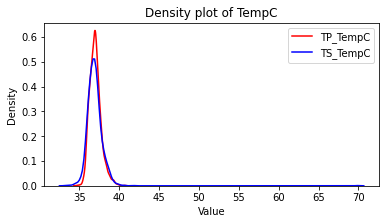

In [64]:
plt.figure(figsize=(6, 3))

sns.kdeplot(NTP_train['TempC'], color='red', label='TP_TempC')
sns.kdeplot(NTS_train['TempC'], color='blue', label='TS_TempC')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of TempC')
plt.legend()

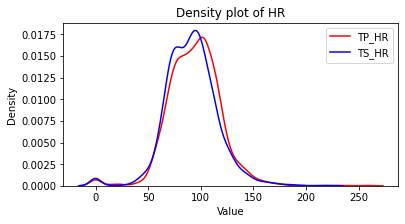

In [65]:
plt.figure(figsize=(6, 3))

sns.kdeplot(NTP_train['HR'], color='red', label='TP_HR')
sns.kdeplot(NTS_train['HR'], color='blue', label='TS_HR')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of HR')
plt.legend()

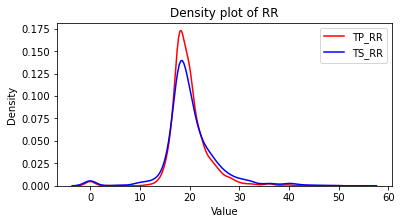

In [66]:
plt.figure(figsize=(6, 3))

sns.kdeplot(NTP_train['RR'], color='red', label='TP_RR')
sns.kdeplot(NTS_train['RR'], color='blue', label='TS_RR')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of RR')
plt.legend()

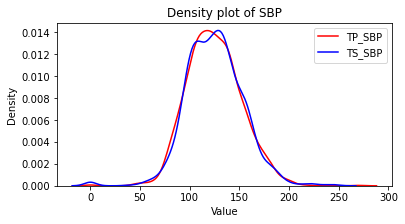

In [67]:
plt.figure(figsize=(6, 3))

sns.kdeplot(NTP_train['SBP'], color='red', label='TP_SBP')
sns.kdeplot(NTS_train['SBP'], color='blue', label='TS_SBP')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of SBP')
plt.legend()

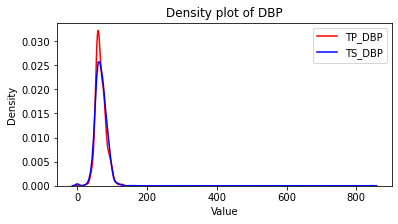

In [68]:
plt.figure(figsize=(6, 3))

sns.kdeplot(NTP_train['DBP'], color='red', label='TP_DBP')
sns.kdeplot(NTS_train['DBP'], color='blue', label='TS_DBP')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of DBP')
plt.legend()

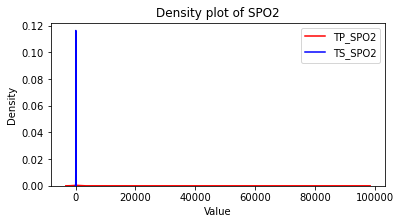

In [69]:
plt.figure(figsize=(6, 3))

sns.kdeplot(NTP_train['SPO2'], color='red', label='TP_SPO2')
sns.kdeplot(NTS_train['SPO2'], color='blue', label='TS_SPO2')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of SPO2')
plt.legend()